In [189]:
""" ----- EDA -----
"""

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

""" ----- Feature Engineering -----
"""

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, Normalizer, RobustScaler, SplineTransformer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, QuantileTransformer, KBinsDiscretizer, PolynomialFeatures, FunctionTransformer
# Log Transform
# Z-score

""" ----- Feature Selection -----
"""

from sklearn.feature_selection import VarianceThreshold, chi2, SelectKBest, f_regression, mutual_info_classif, RFE, SelectFromModel, r_regression

# Models for SelectFromModel 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

""" ----- Model Selection -----
"""

from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

# CV for models
from sklearn.linear_model import RidgeCV, LassoCV, LassoLarsCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.compose import ColumnTransformer

import statsmodels.api as sm

from sklearn.pipeline import make_pipeline, Pipeline

In [190]:
df = pd.read_csv("data/AmesHousing.csv")

In [191]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [192]:
df = df.drop(["Order","PID"], axis=1)

In [193]:
df.shape

(2930, 80)

In [194]:
na_ratios = df.isnull().sum() / len(df)
na_ratios = na_ratios.drop(na_ratios[na_ratios == 0].index).sort_values(ascending = False)
na_ratios = pd.DataFrame({"Missing Proportion": na_ratios})
na_ratios = na_ratios.drop(na_ratios[na_ratios["Missing Proportion"] <0.005].index)
na_ratios

,Missing Proportion
Pool QC,0.995563
Misc Feature,0.963823
Alley,0.932423
Fence,0.804778
Fireplace Qu,0.485324
Lot Frontage,0.167235
Garage Cond,0.054266
Garage Qual,0.054266
Garage Finish,0.054266
Garage Yr Blt,0.054266


In [195]:
df.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 80, dtype: object

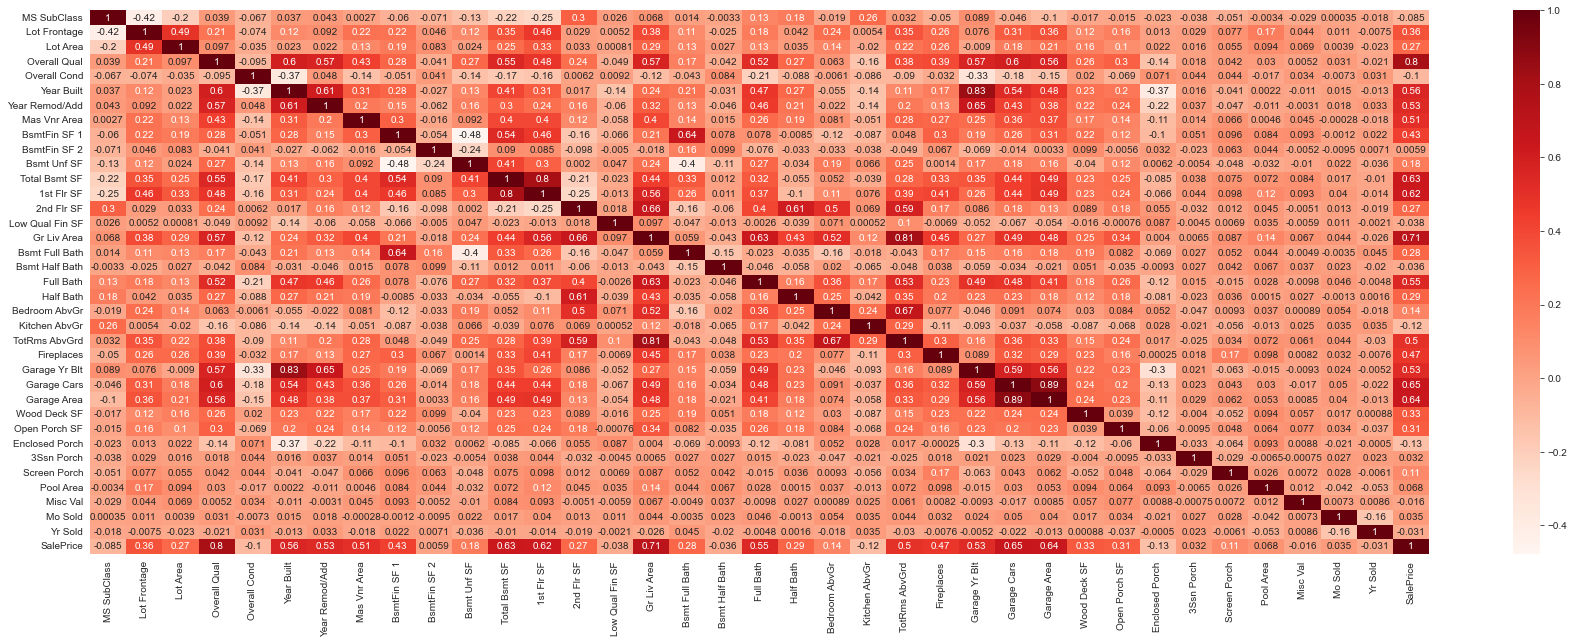

In [196]:
dfCorr = df.corr()
# filteredDf = dfCorr[((dfCorr >= .3) | (dfCorr <= -.3)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

In [197]:
# from dython.nominal import associations
# from dython.nominal import identify_nominal_columns

# complete_correlation= associations(df,compute_only=True)

In [198]:
# filteredDf = complete_correlation['corr'][(complete_correlation['corr'] >= .5)]

In [199]:
# features = filteredDf['SalePrice'][filteredDf['SalePrice'] > 0].index

In [200]:
features = ['Neighborhood', 'Overall Qual', 'Exter Qual', 'Bsmt Qual',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Kitchen Qual',
       'Garage Cars', 'Garage Area', 'Full Bath', 'TotRms AbvGrd', 
       'Year Built', 'Year Remod/Add', 'SalePrice', 'Fireplaces', 'Lot Area', 
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplace Qu', 'Garage Qual', 'Half Bath', 
       'Lot Frontage', 'Heating QC', 'Fence', 'Pool QC', 'Misc Feature',
       'Open Porch SF', 'Wood Deck SF', 'Paved Drive']

In [201]:
y = df.SalePrice
X = df[features]
pre_proc_df = df[features]
pre_proc_df['SalePrice'] = y

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\3025895732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['SalePrice'] = y


In [202]:
pre_proc_df

,Neighborhood,Overall Qual,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Kitchen Qual,Garage Cars,Garage Area,...,Garage Qual,Half Bath,Lot Frontage,Heating QC,Fence,Pool QC,Misc Feature,Open Porch SF,Wood Deck SF,Paved Drive
0,NAmes,6,TA,TA,1080.0,1656,1656,TA,2.0,528.0,...,TA,0,141.0,Fa,NaN,NaN,NaN,62,210,P
1,NAmes,5,TA,TA,882.0,896,896,TA,1.0,730.0,...,TA,0,80.0,TA,MnPrv,NaN,NaN,0,140,Y
2,NAmes,6,TA,TA,1329.0,1329,1329,Gd,1.0,312.0,...,TA,1,81.0,TA,NaN,NaN,Gar2,36,393,Y
3,NAmes,7,Gd,TA,2110.0,2110,2110,Ex,2.0,522.0,...,TA,1,93.0,Ex,NaN,NaN,NaN,0,0,Y
4,Gilbert,5,TA,Gd,928.0,928,1629,TA,2.0,482.0,...,TA,1,74.0,Gd,MnPrv,NaN,NaN,34,212,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Mitchel,6,TA,TA,1003.0,1003,1003,TA,2.0,588.0,...,TA,0,37.0,TA,GdPrv,NaN,NaN,0,120,Y
2926,Mitchel,5,TA,Gd,864.0,902,902,TA,2.0,484.0,...,TA,0,NaN,TA,MnPrv,NaN,NaN,0,164,Y
2927,Mitchel,5,TA,Gd,912.0,970,970,TA,0.0,0.0,...,NaN,0,62.0,TA,MnPrv,NaN,Shed,32,80,Y
2928,Mitchel,5,TA,Gd,1389.0,1389,1389,TA,2.0,418.0,...,TA,0,77.0,Gd,NaN,NaN,NaN,38,240,Y


In [203]:
from IPython import display

pre_proc_df['Exter Qual'].unique()
pre_proc_df['Bsmt Qual'].unique()
# pre_proc_df['Neighborhood'].unique()

array(['TA', 'Gd', 'Ex', nan, 'Fa', 'Po'], dtype=object)

<AxesSubplot:>

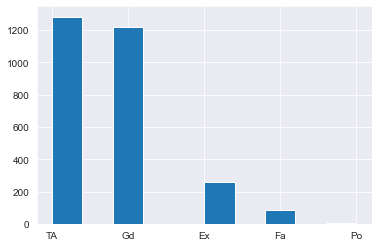

In [204]:
pre_proc_df['Bsmt Qual'].hist()

<AxesSubplot:>

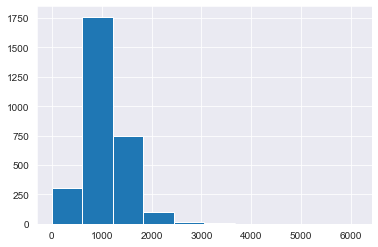

In [205]:
pre_proc_df['Total Bsmt SF'].hist()

<AxesSubplot:>

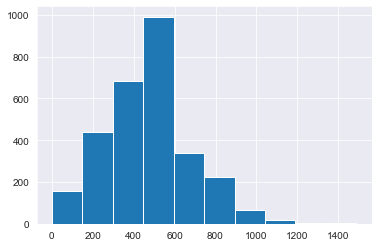

In [206]:
pre_proc_df['Garage Area'].hist()

<AxesSubplot:>

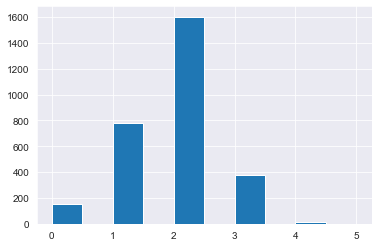

In [207]:
pre_proc_df['Garage Cars'].hist()

In [208]:
pre_proc_df.describe()

,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,Full Bath,TotRms AbvGrd,Year Built,Year Remod/Add,SalePrice,Fireplaces,Lot Area,Bedroom AbvGr,Kitchen AbvGr,Half Bath,Lot Frontage,Open Porch SF,Wood Deck SF
count,2930.000000,2929.000000,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2440.000000,2930.000000,2930.000000
mean,6.094881,1051.614544,1159.557679,1499.690444,1.766815,472.819734,1.566553,6.443003,1971.356314,1984.266553,180796.060068,0.599317,10147.921843,2.854266,1.044369,0.379522,69.224590,47.533447,93.751877
std,1.411026,440.615067,391.890885,505.508887,0.760566,215.046549,0.552941,1.572964,30.245361,20.860286,79886.692357,0.647921,7880.017759,0.827731,0.214076,0.502629,23.365335,67.483400,126.361562
min,1.000000,0.000000,334.000000,334.000000,0.000000,0.000000,0.000000,2.000000,1872.000000,1950.000000,12789.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,5.000000,793.000000,876.250000,1126.000000,1.000000,320.000000,1.000000,5.000000,1954.000000,1965.000000,129500.000000,0.000000,7440.250000,2.000000,1.000000,0.000000,58.000000,0.000000,0.000000
50%,6.000000,990.000000,1084.000000,1442.000000,2.000000,480.000000,2.000000,6.000000,1973.000000,1993.000000,160000.000000,1.000000,9436.500000,3.000000,1.000000,0.000000,68.000000,27.000000,0.000000
75%,7.000000,1302.000000,1384.000000,1742.750000,2.000000,576.000000,2.000000,7.000000,2001.000000,2004.000000,213500.000000,1.000000,11555.250000,3.000000,1.000000,1.000000,80.000000,70.000000,168.000000
max,10.000000,6110.000000,5095.000000,5642.000000,5.000000,1488.000000,4.000000,15.000000,2010.000000,2010.000000,755000.000000,4.000000,215245.000000,8.000000,3.000000,2.000000,313.000000,742.000000,1424.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Overall Qual'>

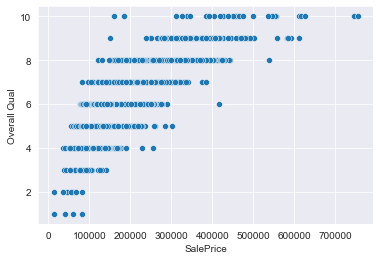

In [209]:
sns.scatterplot(data=pre_proc_df, x="SalePrice", y="Overall Qual")

In [210]:
pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual'].isna()] = 'TA'

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\227490997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual'].isna()] = 'TA'
c:\Users\Apprenant\anaconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [211]:
# pre_proc_df['Total Bsmt SF'][pre_proc_df['Total Bsmt SF'].isna()] = np.mean(pre_proc_df['Total Bsmt SF'])

In [212]:
# pre_proc_df['Garage Area'][pre_proc_df['Garage Area'].isna()] = np.mean(pre_proc_df['Garage Area'])

In [213]:
# pre_proc_df['Garage Cars'][pre_proc_df['Garage Cars'].isna()] = 2

In [214]:
pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual']=='Po'] = 0
pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual']=='Fa'] = 1
pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual']=='TA'] = 2
pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual']=='Gd'] = 3
pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual']=='Ex'] = 4


pre_proc_df['Overall Qual'][pre_proc_df['Overall Qual']=='Po'] = 0
pre_proc_df['Overall Qual'][pre_proc_df['Overall Qual']=='Fa'] = 1
pre_proc_df['Overall Qual'][pre_proc_df['Overall Qual']=='TA'] = 2
pre_proc_df['Overall Qual'][pre_proc_df['Overall Qual']=='Gd'] = 3
pre_proc_df['Overall Qual'][pre_proc_df['Overall Qual']=='Ex'] = 4


pre_proc_df['Kitchen Qual'][pre_proc_df['Kitchen Qual']=='Po'] = 0
pre_proc_df['Kitchen Qual'][pre_proc_df['Kitchen Qual']=='Fa'] = 1
pre_proc_df['Kitchen Qual'][pre_proc_df['Kitchen Qual']=='TA'] = 2
pre_proc_df['Kitchen Qual'][pre_proc_df['Kitchen Qual']=='Gd'] = 3
pre_proc_df['Kitchen Qual'][pre_proc_df['Kitchen Qual']=='Ex'] = 4


pre_proc_df['Exter Qual'][pre_proc_df['Exter Qual']=='Po'] = 0
pre_proc_df['Exter Qual'][pre_proc_df['Exter Qual']=='TA'] = 2
pre_proc_df['Exter Qual'][pre_proc_df['Exter Qual']=='Gd'] = 3
pre_proc_df['Exter Qual'][pre_proc_df['Exter Qual']=='Fa'] = 1
pre_proc_df['Exter Qual'][pre_proc_df['Exter Qual']=='Ex'] = 4


pre_proc_df['Fireplace Qu'][pre_proc_df['Fireplace Qu']=='Po'] = 0
pre_proc_df['Fireplace Qu'][pre_proc_df['Fireplace Qu']=='TA'] = 2
pre_proc_df['Fireplace Qu'][pre_proc_df['Fireplace Qu']=='Gd'] = 3
pre_proc_df['Fireplace Qu'][pre_proc_df['Fireplace Qu']=='Fa'] = 1
pre_proc_df['Fireplace Qu'][pre_proc_df['Fireplace Qu']=='Ex'] = 4

pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Po'] = 0
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='TA'] = 2
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Gd'] = 3
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Fa'] = 1
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Ex'] = 4

pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Po'] = 0
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='TA'] = 2
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Gd'] = 3
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Fa'] = 1
pre_proc_df['Heating QC'][pre_proc_df['Heating QC']=='Ex'] = 4

pre_proc_df['Pool QC'][pre_proc_df['Pool QC']== np.nan] = 0
pre_proc_df['Pool QC'][pre_proc_df['Pool QC']=='TA'] = 2
pre_proc_df['Pool QC'][pre_proc_df['Pool QC']=='Gd'] = 3
pre_proc_df['Pool QC'][pre_proc_df['Pool QC']=='Fa'] = 1
pre_proc_df['Pool QC'][pre_proc_df['Pool QC']=='Ex'] = 4

# ['Po', 'Fa','TA', 'Gd','Ex']

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\3900469738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual']=='Po'] = 0
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\3900469738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Bsmt Qual'][pre_proc_df['Bsmt Qual']=='Fa'] = 1
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\3900469738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [215]:
# Tot rms + bathrooms

<AxesSubplot:>

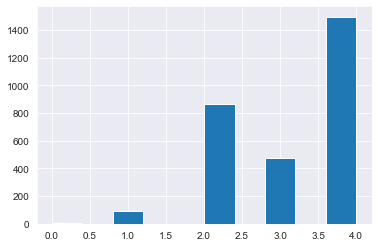

In [216]:
pre_proc_df['Heating QC'].hist()

<AxesSubplot:>

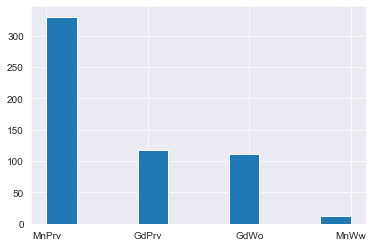

In [217]:
pre_proc_df['Fence'].hist()

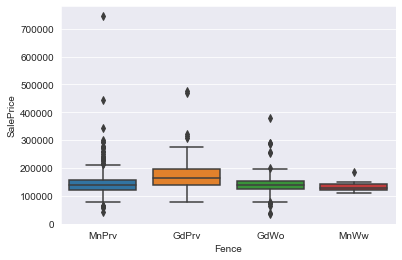

In [218]:
ax = sns.boxplot(x='Fence', y="SalePrice", data=pre_proc_df)

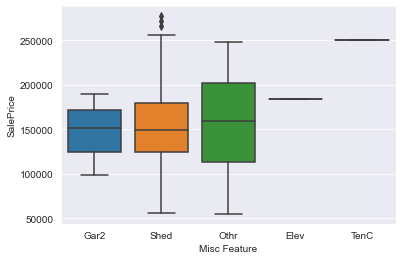

In [219]:
ax = sns.boxplot(x='Misc Feature', y="SalePrice", data=pre_proc_df)

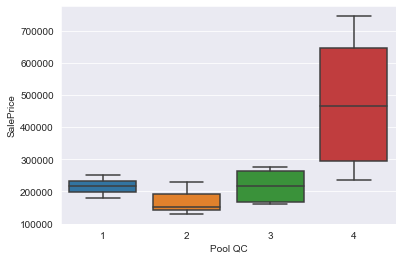

In [220]:
ax = sns.boxplot(x='Pool QC', y="SalePrice", data=pre_proc_df)

In [221]:
pre_proc_df['Half Bath'].unique()

array([0, 1, 2], dtype=int64)

In [222]:
pre_proc_df['Half Bath'][pre_proc_df['Half Bath']==1] = 0.5
pre_proc_df['Half Bath'][pre_proc_df['Half Bath']==2] = 1

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\1906193981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Half Bath'][pre_proc_df['Half Bath']==1] = 0.5
c:\Users\Apprenant\anaconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\1906193981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [223]:
pre_proc_df['Other Qual'] = pre_proc_df['Exter Qual'] + pre_proc_df['Bsmt Qual'] + pre_proc_df['Kitchen Qual']  + pre_proc_df['Fireplace Qu']
pre_proc_df['All Bath'] = pre_proc_df['Full Bath'] = pre_proc_df['Half Bath']
pre_proc_df['Full Lot'] = pre_proc_df['Lot Frontage'] + pre_proc_df['Lot Area']
pre_proc_df = pre_proc_df.drop(['Bsmt Qual', 'Exter Qual', 'Kitchen Qual'], axis=1)

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\804293246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Other Qual'] = pre_proc_df['Exter Qual'] + pre_proc_df['Bsmt Qual'] + pre_proc_df['Kitchen Qual']  + pre_proc_df['Fireplace Qu']
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\804293246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['All Bath'] = pre_proc_df['Full Bath'] = pre_proc_df['Half Bath']
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\804293246

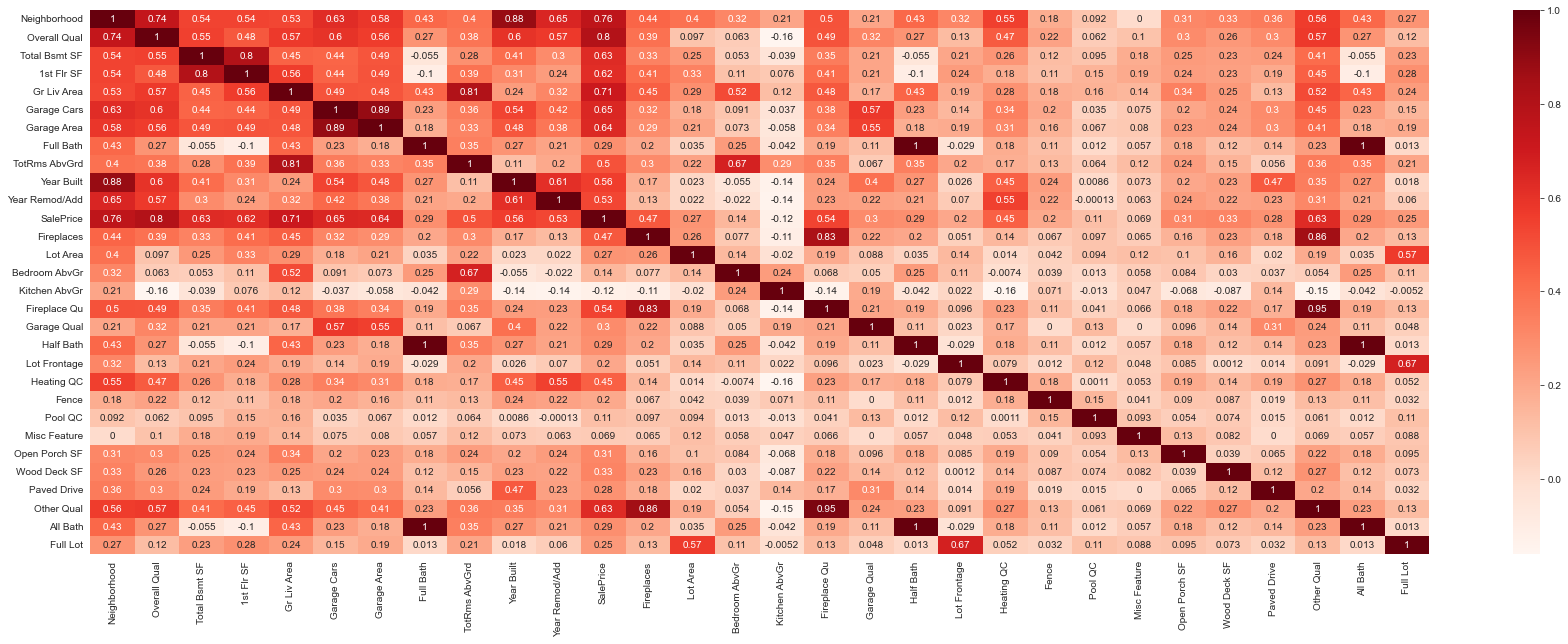

In [224]:
from dython.nominal import associations
complete_correlation= associations(pre_proc_df ,compute_only=True)

plt.figure(figsize=(30,10))
sns.heatmap(complete_correlation['corr'], annot=True, cmap="Reds")
plt.show()

In [225]:
pre_proc_df.isnull().sum()

Neighborhood         0
Overall Qual         0
Total Bsmt SF        1
1st Flr SF           0
Gr Liv Area          0
Garage Cars          1
Garage Area          1
Full Bath            0
TotRms AbvGrd        0
Year Built           0
Year Remod/Add       0
SalePrice            0
Fireplaces           0
Lot Area             0
Bedroom AbvGr        0
Kitchen AbvGr        0
Fireplace Qu      1422
Garage Qual        159
Half Bath            0
Lot Frontage       490
Heating QC           0
Fence             2358
Pool QC           2917
Misc Feature      2824
Open Porch SF        0
Wood Deck SF         0
Paved Drive          0
Other Qual        1422
All Bath             0
Full Lot           490
dtype: int64

In [226]:
pre_proc_df

,Neighborhood,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,Full Bath,TotRms AbvGrd,Year Built,...,Heating QC,Fence,Pool QC,Misc Feature,Open Porch SF,Wood Deck SF,Paved Drive,Other Qual,All Bath,Full Lot
0,NAmes,6,1080.0,1656,1656,2.0,528.0,0.0,7,1960,...,1,NaN,NaN,NaN,62,210,P,9,0.0,31911.0
1,NAmes,5,882.0,896,896,1.0,730.0,0.0,5,1961,...,2,MnPrv,NaN,NaN,0,140,Y,NaN,0.0,11702.0
2,NAmes,6,1329.0,1329,1329,1.0,312.0,0.5,6,1958,...,2,NaN,NaN,Gar2,36,393,Y,NaN,0.5,14348.0
3,NAmes,7,2110.0,2110,2110,2.0,522.0,0.5,8,1968,...,4,NaN,NaN,NaN,0,0,Y,11,0.5,11253.0
4,Gilbert,5,928.0,928,1629,2.0,482.0,0.5,6,1997,...,3,MnPrv,NaN,NaN,34,212,Y,9,0.5,13904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Mitchel,6,1003.0,1003,1003,2.0,588.0,0.0,6,1984,...,2,GdPrv,NaN,NaN,0,120,Y,NaN,0.0,7974.0
2926,Mitchel,5,864.0,902,902,2.0,484.0,0.0,5,1983,...,2,MnPrv,NaN,NaN,0,164,Y,NaN,0.0,NaN
2927,Mitchel,5,912.0,970,970,0.0,0.0,0.0,6,1992,...,2,MnPrv,NaN,Shed,32,80,Y,NaN,0.0,10503.0
2928,Mitchel,5,1389.0,1389,1389,2.0,418.0,0.0,6,1974,...,3,NaN,NaN,NaN,38,240,Y,9,0.0,10087.0


In [227]:
pre_proc_df['TotRms AbvGrd'].unique()

array([ 7,  5,  6,  8,  4, 12, 10, 11,  9,  3, 13,  2, 15, 14],
      dtype=int64)

In [228]:
# input value related to the price in bsmt qual
# pre_proc_df['Total Rooms'] = pre_proc_df['TotRms AbvGrd'] + pre_proc_df['Full Bath']

In [229]:
pre_proc_df['Total SF'] = pre_proc_df['Total Bsmt SF'] + pre_proc_df['Gr Liv Area']

<AxesSubplot:>

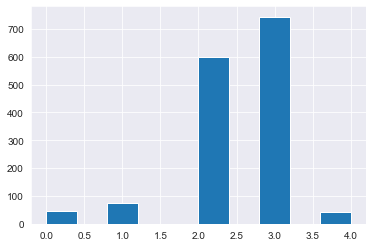

In [230]:
pre_proc_df['Fireplace Qu'].hist()

In [231]:
pre_proc_df.dtypes

Neighborhood       object
Overall Qual        int64
Total Bsmt SF     float64
1st Flr SF          int64
Gr Liv Area         int64
Garage Cars       float64
Garage Area       float64
Full Bath         float64
TotRms AbvGrd       int64
Year Built          int64
Year Remod/Add      int64
SalePrice           int64
Fireplaces          int64
Lot Area            int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Fireplace Qu       object
Garage Qual        object
Half Bath         float64
Lot Frontage      float64
Heating QC         object
Fence              object
Pool QC            object
Misc Feature       object
Open Porch SF       int64
Wood Deck SF        int64
Paved Drive        object
Other Qual         object
All Bath          float64
Full Lot          float64
Total SF          float64
dtype: object

<AxesSubplot:xlabel='Garage Cars'>

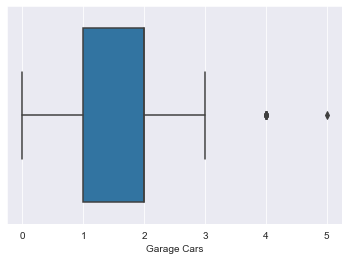

In [232]:
sns.boxplot(x=pre_proc_df['Garage Cars'])

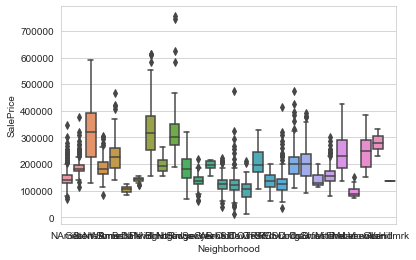

In [233]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x='Neighborhood', y="SalePrice", data=pre_proc_df)

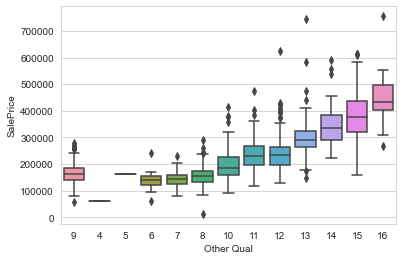

In [234]:
ax = sns.boxplot(x='Other Qual', y="SalePrice", data=pre_proc_df)

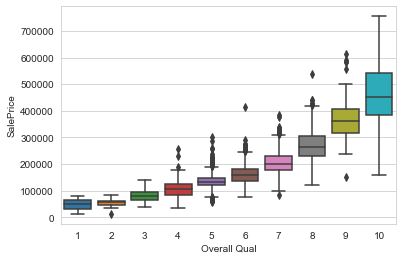

In [235]:
ax = sns.boxplot(x='Overall Qual', y="SalePrice", data=pre_proc_df)

In [236]:
pre_proc_df.cov()

,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,Full Bath,TotRms AbvGrd,Year Built,Year Remod/Add,...,Lot Area,Bedroom AbvGr,Kitchen AbvGr,Half Bath,Lot Frontage,Open Porch SF,Wood Deck SF,All Bath,Full Lot,Total SF
Overall Qual,1.990995,3.401933e+02,2.642287e+02,4.069696e+02,0.643463,1.709987e+02,0.095338,0.844945,2.547933e+01,16.766097,...,1.080629e+03,0.073921,-0.048253,0.095338,7.186141,2.841506e+01,4.558449e+01,0.095338,1.438218e+03,7.468698e+02
Total Bsmt SF,340.193281,1.941416e+05,1.382757e+05,9.903745e+04,146.669622,4.601077e+04,-6.116355,194.533160,5.431199e+03,2733.460091,...,8.805808e+05,18.943236,-3.662189,-6.116355,3719.643244,7.304136e+03,1.280282e+04,-6.116355,8.566938e+05,2.931791e+05
1st Flr SF,264.228735,1.382757e+05,1.535785e+05,1.113675e+05,130.999872,4.140258e+04,-10.262741,240.507727,3.679876e+03,1979.220708,...,1.025977e+06,34.594445,6.378116,-10.262741,4246.255573,6.295263e+03,1.124751e+04,-10.262741,9.824727e+05,2.496269e+05
Gr Liv Area,406.969634,9.903745e+04,1.113675e+05,2.555392e+05,187.960046,5.271684e+04,55.129605,642.297987,3.695818e+03,3341.253248,...,1.137661e+06,216.245415,12.751875,55.129605,4539.672902,1.162780e+04,1.597902e+04,55.129605,1.118670e+06,3.545394e+05
Garage Cars,0.643463,1.466696e+02,1.309999e+02,1.879600e+02,0.578461,1.455129e+02,0.044621,0.425435,1.235985e+01,6.749870,...,1.076048e+03,0.057524,-0.006040,0.044621,5.653297,1.048068e+01,2.318573e+01,0.044621,1.124573e+03,3.345357e+02
Garage Area,170.998734,4.601077e+04,4.140258e+04,5.271684e+04,145.512937,4.624502e+04,9.638568,110.723356,3.122021e+03,1688.820725,...,3.607017e+05,13.104859,-2.660371,9.638568,1859.943517,3.380324e+03,6.478059e+03,9.638568,3.720925e+05,9.870585e+04
Full Bath,0.095338,-6.116355e+00,-1.026274e+01,5.512961e+01,0.044621,9.638568e+00,0.063159,0.136972,2.046736e+00,1.110207,...,7.029787e+01,0.051392,-0.002277,0.063159,0.242838,3.064665e+00,3.658742e+00,0.063159,1.043826e+02,4.899294e+01
TotRms AbvGrd,0.844945,1.945332e+02,2.405077e+02,6.422980e+02,0.425435,1.107234e+02,0.136972,2.474217,5.324515e+00,6.481398,...,2.684713e+03,0.875781,0.099150,0.136972,13.053767,2.501761e+01,3.075557e+01,0.136972,2.806145e+03,8.365466e+02
Year Built,25.479326,5.431199e+03,3.679876e+03,3.695818e+03,12.359849,3.122021e+03,2.046736,5.324515,9.147818e+02,386.187340,...,5.543290e+03,-1.379260,-0.892564,2.046736,89.592496,4.048747e+02,8.750656e+02,2.046736,1.256527e+04,9.123049e+03
Year Remod/Add,16.766097,2.733460e+03,1.979221e+03,3.341253e+03,6.749870,1.688821e+03,1.110207,6.481398,3.861873e+02,435.151527,...,3.564111e+03,-0.371861,-0.635934,1.110207,45.798174,3.403146e+02,5.742563e+02,1.110207,8.626429e+03,6.068787e+03


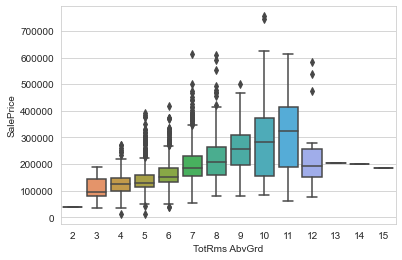

In [237]:
ax = sns.boxplot(x='TotRms AbvGrd', y="SalePrice", data=pre_proc_df)


In [238]:
pre_proc_df['Total Rooms'] = pre_proc_df['TotRms AbvGrd'] + pre_proc_df['All Bath']

In [239]:
pre_proc_df['Other Qual'][pre_proc_df['Other Qual'] == 5] = 6
pre_proc_df['Other Qual'][pre_proc_df['Other Qual'] == 4] = 6
pre_proc_df['Other Qual'][pre_proc_df['Other Qual'] == 9] = 8

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\2182778316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Other Qual'][pre_proc_df['Other Qual'] == 5] = 6
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\2182778316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Other Qual'][pre_proc_df['Other Qual'] == 4] = 6
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\2182778316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<AxesSubplot:>

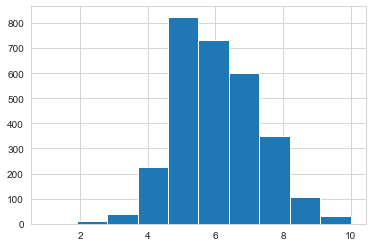

In [240]:
pre_proc_df['Overall Qual'].hist()

In [241]:
# ax = sns.boxplot(x='Full Lot', y="SalePrice", data=pre_proc_df)

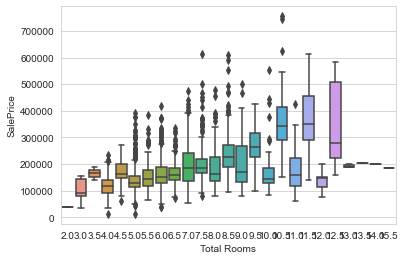

In [242]:
ax = sns.boxplot(x='Total Rooms', y="SalePrice", data=pre_proc_df)

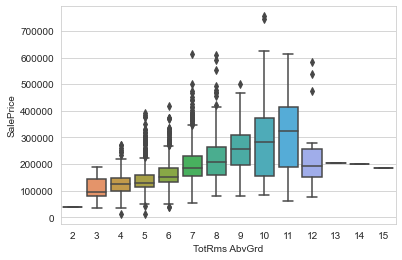

In [243]:
ax = sns.boxplot(x='TotRms AbvGrd', y="SalePrice", data=pre_proc_df)


In [244]:
# pre_proc_df['Total Rooms'][pre_proc_df['Total Rooms'] == 14] = 13
# pre_proc_df['Total Rooms'][pre_proc_df['Total Rooms'] == 16] = 13

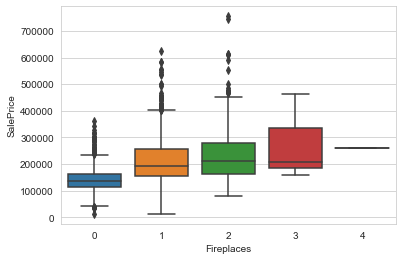

In [245]:
ax = sns.boxplot(x='Fireplaces', y="SalePrice", data=pre_proc_df)

<AxesSubplot:>

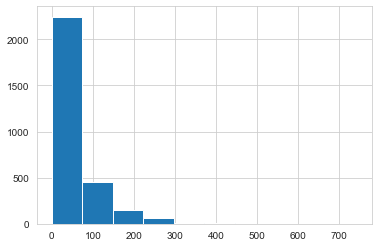

In [246]:
pre_proc_df['Open Porch SF'].hist()

In [247]:
pre_proc_df[pre_proc_df['Open Porch SF'] == 0]

,Neighborhood,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,Full Bath,TotRms AbvGrd,Year Built,...,Pool QC,Misc Feature,Open Porch SF,Wood Deck SF,Paved Drive,Other Qual,All Bath,Full Lot,Total SF,Total Rooms
1,NAmes,5,882.0,896,896,1.0,730.0,0.0,5,1961,...,NaN,NaN,0,140,Y,NaN,0.0,11702.0,1778.0,5.0
3,NAmes,7,2110.0,2110,2110,2.0,522.0,0.5,8,1968,...,NaN,NaN,0,0,Y,11,0.5,11253.0,4220.0,8.5
6,StoneBr,8,1338.0,1338,1338,2.0,582.0,0.0,6,2001,...,NaN,NaN,0,0,Y,NaN,0.0,4961.0,2676.0,6.0
13,Gilbert,7,1300.0,1341,1341,2.0,506.0,0.5,5,1990,...,NaN,NaN,0,192,Y,8,0.5,10261.0,2641.0,5.5
17,StoneBr,9,1856.0,1856,1856,3.0,834.0,0.5,8,2010,...,NaN,NaN,0,113,Y,15,0.5,11482.0,3712.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,Mitchel,6,1728.0,1728,1728,2.0,574.0,0.0,8,1976,...,NaN,NaN,0,40,Y,NaN,0.0,12695.0,3456.0,8.0
2922,Mitchel,5,1728.0,1728,1728,2.0,560.0,0.0,8,1976,...,NaN,NaN,0,0,Y,NaN,0.0,9360.0,3456.0,8.0
2924,Mitchel,5,1224.0,1224,1224,2.0,576.0,0.0,7,1960,...,NaN,NaN,0,474,Y,8,0.0,20160.0,2448.0,7.0
2925,Mitchel,6,1003.0,1003,1003,2.0,588.0,0.0,6,1984,...,NaN,NaN,0,120,Y,NaN,0.0,7974.0,2006.0,6.0


In [248]:
pre_proc_df['Paved Drive'][pre_proc_df['Paved Drive'] == 'P'] = 1
pre_proc_df['Paved Drive'][pre_proc_df['Paved Drive'] == 'Y'] = 2
pre_proc_df['Paved Drive'][pre_proc_df['Paved Drive'] == 'N'] = 0

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\1419934182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Paved Drive'][pre_proc_df['Paved Drive'] == 'P'] = 1
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\1419934182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Paved Drive'][pre_proc_df['Paved Drive'] == 'Y'] = 2
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2084\1419934182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<AxesSubplot:>

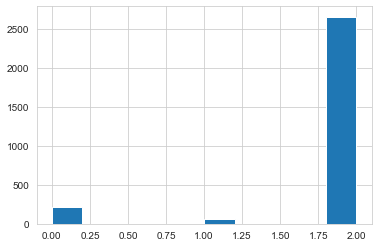

In [249]:
pre_proc_df['Paved Drive'].hist()

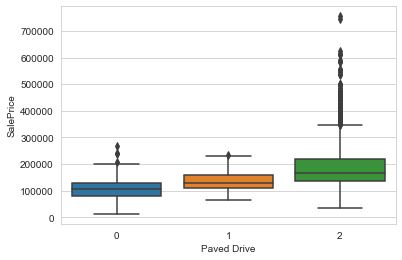

In [250]:
ax = sns.boxplot(x='Paved Drive', y="SalePrice", data=pre_proc_df)

In [251]:
pre_proc_df['Year Remod/Add'].sort_values()

759    1950
714    1950
717    1950
720    1950
724    1950
       ... 
45     2010
252    2010
44     2010
17     2010
67     2010
Name: Year Remod/Add, Length: 2930, dtype: int64

In [252]:
ft = ['Year Built', 'Year Remod/Add']
pre_proc_df[ft]

,Year Built,Year Remod/Add
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1997,1998
...,...,...
2925,1984,1984
2926,1983,1983
2927,1992,1992
2928,1974,1975


In [253]:
pre_proc_df['Time Between Sales'] = pre_proc_df['Year Remod/Add'] - pre_proc_df['Year Built']

<AxesSubplot:>

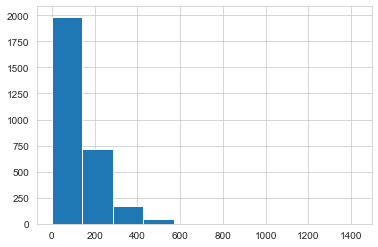

In [254]:
pre_proc_df['Wood Deck SF'].hist()

<AxesSubplot:>

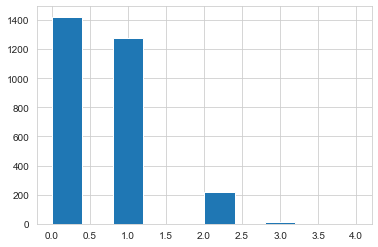

In [255]:
pre_proc_df['Fireplaces'].hist()

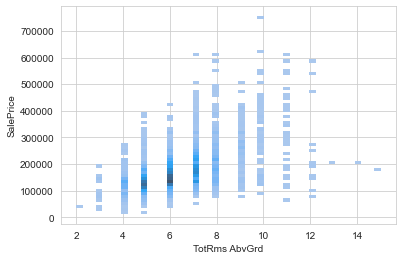

In [256]:
ax = sns.histplot(x='TotRms AbvGrd', y="SalePrice", data=pre_proc_df)

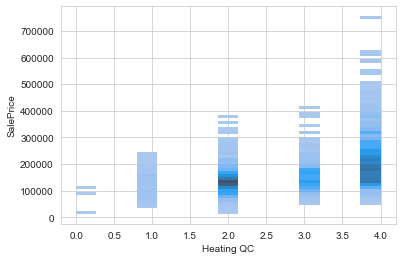

In [257]:
ax = sns.histplot(x='Heating QC', y="SalePrice", data=pre_proc_df)


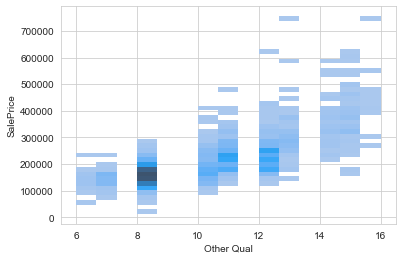

In [258]:
ax = sns.histplot(x='Other Qual', y="SalePrice", data=pre_proc_df)


In [259]:
# pre_proc_df = pre_proc_df.drop(pre_proc_df[pre_proc_df['TotRms AbvGrd'] == 15].index)
# pre_proc_df = pre_proc_df.drop(pre_proc_df[pre_proc_df['TotRms AbvGrd'] == 14].index)
# pre_proc_df = pre_proc_df.drop(pre_proc_df[pre_proc_df['TotRms AbvGrd'] == 13].index)

In [260]:
pre_proc_df['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

In [261]:
pre_proc_df.shape

(2930, 33)

In [262]:
q1 = pre_proc_df['SalePrice'].quantile(0.99)
# q2 = pre_proc_df['SalePrice'].quantile(0.01)

In [263]:
pre_proc_df = pre_proc_df[pre_proc_df['SalePrice'] < q1]

In [264]:
# pre_proc_df = pre_proc_df[pre_proc_df['SalePrice'] > q2]

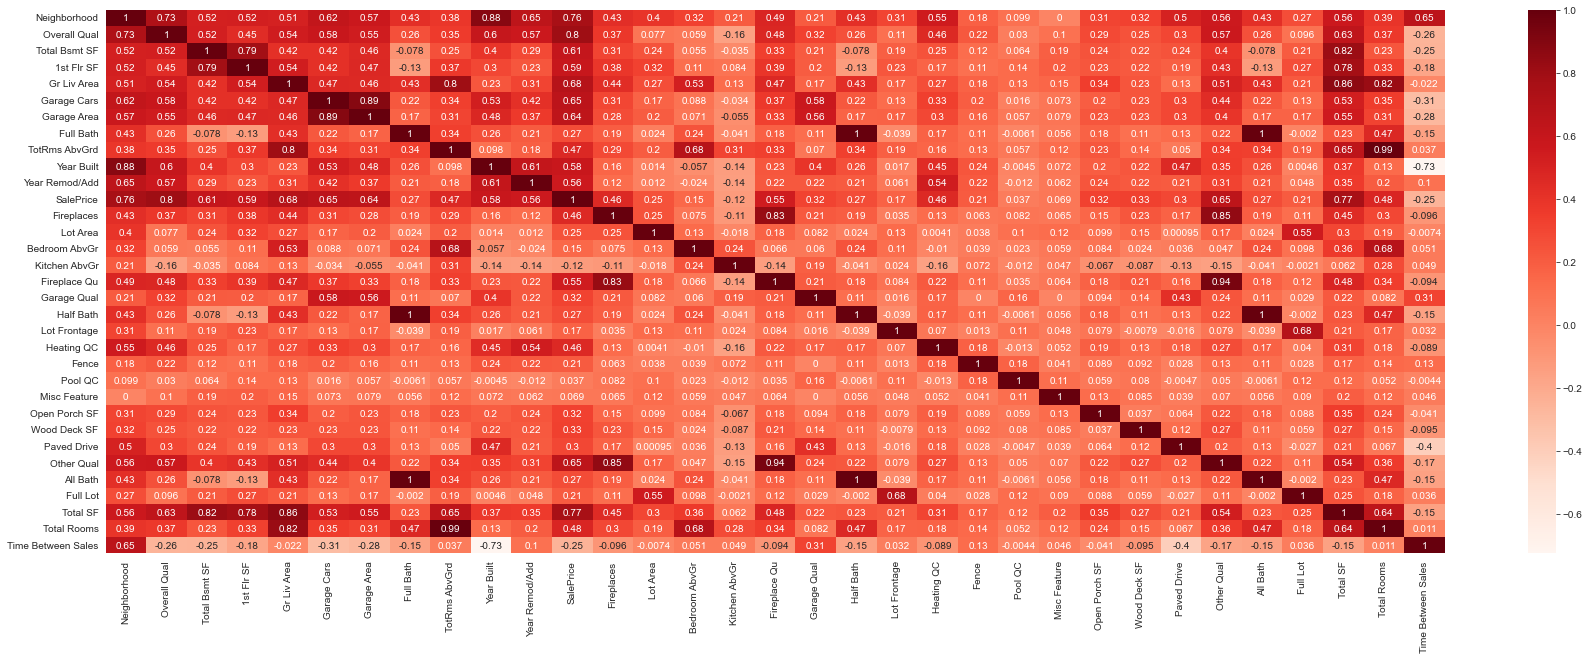

In [265]:
from dython.nominal import associations
complete_correlation= associations(pre_proc_df ,compute_only=True)

plt.figure(figsize=(30,10))
sns.heatmap(complete_correlation['corr'], annot=True, cmap="Reds")
plt.show()

In [268]:
y = pre_proc_df['SalePrice']
X = pre_proc_df.drop(['SalePrice'], axis=1)

X = X.rename(columns={'Overall Qual': 'overallInteriorQuality', 
                  'Total SF':'totalSf', 
                  'Garage Area':'garageArea',
                  'Fireplaces':'fireplaces',
                  'TotRms AbvGrd':'roomNbAbvGrd',
                  'Other Qual':'overallExteriorQuality', 
                  'Full Lot':'fullLot', 
                  'Time Between Sales':'timeBetweenSale',
                  'Year Remod/Add':'saleYear',
                  'Neighborhood':'neighborhood'})

In [269]:


num_cols = ['overallInteriorQuality', 'totalSf', 'garageArea', 'fireplaces', 'roomNbAbvGrd', 'overallExteriorQuality', 'fullLot', 'timeBetweenSale']
year_cols = ['saleYear']
ohe_cols = ['neighborhood']


num_pipe = Pipeline([
     ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
     ('scaler', MinMaxScaler()),
     # ('spline', SplineTransformer()),
     # ('log_trans', FunctionTransformer(np.log10, validate=True)),
     # ('poly', PolynomialFeatures(3))
     # ('uni', PowerTransformer(method='box-cox', standardize=False))
])

preprocessor = ColumnTransformer(
  transformers=[
     ('ohe_encoder', OneHotEncoder(sparse=False, drop='first'), ohe_cols),
     ('discretizer', KBinsDiscretizer(n_bins=8, encode='onehot'), year_cols),
     ('num_imputer', num_pipe, num_cols)
])

X_prep = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.3, random_state=42)

In [270]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.4       , 0.04454597,
        0.8515625 ],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.02296434,
        0.1953125 ],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.0221235 ,
        0.078125  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.4       , 0.03359166,
        0.0078125 ],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.03684292,
        0.8359375 ],
       [0.        , 0.        , 0.        , ..., 0.7       , 0.03714188,
        0.015625  ]])

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", ElasticNet(l1_ratio=1, alpha=0.1))]
)

reg_pipe.fit(X_train, y_train)

from joblib import dump
dump(reg_pipe, 'elasticnet.joblib')

c:\Users\Apprenant\anaconda3\envs\datascience\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Apprenant\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.816e+09, tolerance: 1.035e+09
  model = cd_fast.enet_coordinate_descent(


['elasticnet.joblib']

In [ ]:
statmod = sm.OLS(y_train, X_train).fit()
print(statmod.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     276.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:14:11   Log-Likelihood:                -23615.
No. Observations:                2030   AIC:                         4.732e+04
Df Residuals:                    1987   BIC:                         4.756e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9559.0425   1.19e+04      0.801      0.4

In [ ]:
sm_pred  = statmod.predict(X_test)

print('MAE on test data with lr: ',  mean_absolute_error(y_test, sm_pred))

MAE on test data with lr:  17811.69305655493


In [ ]:
lassocv = LassoCV(cv = 15, positive = True)
ridgecv = RidgeCV(cv = 15)
en = ElasticNet(l1_ratio=1, alpha=0.1)
lr = LinearRegression()

en.fit(X_train, y_train)
lassocv.fit(X_train, y_train)
ridgecv.fit(X_train, y_train)
lr.fit(X_train, y_train)

c:\Users\Apprenant\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.121e+10, tolerance: 1.035e+09
  model = cd_fast.enet_coordinate_descent(


LinearRegression()

In [ ]:
ridgecv.best_score_

0.8395458061014606

In [ ]:
print(lr.score(X_train, y_train))
print(ridgecv.score(X_train, y_train))
print(lassocv.score(X_train, y_train))
print(en.score(X_train, y_train))


lr_pred  = lr.predict(X_test)
ridge_pred  = ridgecv.predict(X_test)
lasso_pred  = lassocv.predict(X_test)
en_pred  = en.predict(X_test)

print('MAE on test data with lr: ',  mean_absolute_error(y_test, lr_pred))
print('MAE on test data with ridge: ',  mean_absolute_error(y_test, ridge_pred))
print('MAE on test data with lasso: ',  mean_absolute_error(y_test, lasso_pred))
print('MAE on test data with ElasticNet: ',  mean_absolute_error(y_test, en_pred))


0.8539692811453189
0.8522319143299948
0.852404308884955
0.8539957035256727
MAE on test data with lr:  17826.397701149424
MAE on test data with ridge:  18150.789336787257
MAE on test data with lasso:  17955.857241533882
MAE on test data with ElasticNet:  17812.72781471496


In [ ]:
# def half_callable(X):
#     return round(len(X[0]) / 8)
half_selector = SelectFromModel(estimator=LassoCV(cv = 15, positive = True),
                                max_features=30)
_ = half_selector.fit(X_train, y_train)

In [ ]:
half_selector.get_feature_names_out(input_features=None)

array(['x2', 'x3', 'x4', 'x5', 'x7', 'x9', 'x13', 'x14', 'x16', 'x17',
       'x18', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41'], dtype=object)

In [ ]:
from joblib import dump
dump(en, 'elasticnet.joblib')

['elasticnet.joblib']